In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
full_data = pd.read_csv(r"C:\Users\Edwin\Desktop\OT2-DOE\PlanPrepareProcess\Temp or Working\06_10_21_5CB_Abs_Unblanked")

wavelength_columns = [col for col in full_data.columns if 'nm' in col]
wavelengths = [float(wavelength.replace("nm","")) for wavelength in wavelength_columns]
full_spectra = full_data[wavelength_columns]

full_data

,UID,Labware,Slot,Well,5CB concentration wtf,SDS concentration wtf,ethanol concentration wtf,water concentration wtf,5CB amount mass g,5CB amount volume uL,...,655.0nm,660.0nm,665.0nm,670.0nm,675.0nm,680.0nm,685.0nm,690.0nm,695.0nm,700.0nm
0,S2_A1_06-11-2021,Falcon 48 Well Plate 1500 ÂµL,2.0,A1,0.000,0.000,0.100000,0.900000,0.000,0.000000,...,0.036,0.036,0.037,0.036,0.037,0.037,0.037,0.037,0.037,0.037
1,S2_A2_06-11-2021,Falcon 48 Well Plate 1500 ÂµL,2.0,A2,0.000,0.000,0.177778,0.822222,0.000,0.000000,...,0.036,0.036,0.036,0.036,0.036,0.036,0.036,0.036,0.036,0.037
2,S2_A3_06-11-2021,Falcon 48 Well Plate 1500 ÂµL,2.0,A3,0.000,0.000,0.255556,0.744444,0.000,0.000000,...,0.036,0.036,0.036,0.035,0.035,0.035,0.035,0.036,0.036,0.036
3,S2_A4_06-11-2021,Falcon 48 Well Plate 1500 ÂµL,2.0,A4,0.000,0.000,0.333333,0.666667,0.000,0.000000,...,0.039,0.039,0.039,0.039,0.039,0.039,0.038,0.038,0.039,0.039
4,S2_A5_06-11-2021,Falcon 48 Well Plate 1500 ÂµL,2.0,A5,0.000,0.000,0.411111,0.588889,0.000,0.000000,...,0.039,0.039,0.039,0.039,0.039,0.039,0.039,0.039,0.039,0.039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,S6_D5_06-11-2021,Falcon 48 Well Plate 1500 ÂµL,6.0,D5,0.001,0.001,0.488889,0.509111,0.001,0.990099,...,1.605,1.602,1.599,1.597,1.593,1.591,1.588,1.585,1.583,1.580
268,S6_D6_06-11-2021,Falcon 48 Well Plate 1500 ÂµL,6.0,D6,0.001,0.001,0.566667,0.431333,0.001,0.990099,...,0.572,0.573,0.573,0.573,0.574,0.574,0.574,0.574,0.575,0.575
269,S6_D7_06-11-2021,Falcon 48 Well Plate 1500 ÂµL,6.0,D7,0.001,0.001,0.644444,0.353556,0.001,0.990099,...,0.038,0.038,0.038,0.038,0.038,0.038,0.038,0.038,0.038,0.038
270,S6_D8_06-11-2021,Falcon 48 Well Plate 1500 ÂµL,6.0,D8,0.001,0.001,0.722222,0.275778,0.001,0.990099,...,0.038,0.038,0.038,0.037,0.037,0.037,0.037,0.037,0.037,0.037


In [3]:
cb_0 = full_data[full_data['5CB concentration wtf'] == 0]
blanks = cb_0[cb_0['SDS concentration wtf'] == 0].copy()
samples = full_data.copy()
blanked_samples = samples.copy()
blanks

,UID,Labware,Slot,Well,5CB concentration wtf,SDS concentration wtf,ethanol concentration wtf,water concentration wtf,5CB amount mass g,5CB amount volume uL,...,655.0nm,660.0nm,665.0nm,670.0nm,675.0nm,680.0nm,685.0nm,690.0nm,695.0nm,700.0nm
0,S2_A1_06-11-2021,Falcon 48 Well Plate 1500 ÂµL,2.0,A1,0.0,0.0,0.100000,0.900000,0.0,0.0,...,0.036,0.036,0.037,0.036,0.037,0.037,0.037,0.037,0.037,0.037
1,S2_A2_06-11-2021,Falcon 48 Well Plate 1500 ÂµL,2.0,A2,0.0,0.0,0.177778,0.822222,0.0,0.0,...,0.036,0.036,0.036,0.036,0.036,0.036,0.036,0.036,0.036,0.037
2,S2_A3_06-11-2021,Falcon 48 Well Plate 1500 ÂµL,2.0,A3,0.0,0.0,0.255556,0.744444,0.0,0.0,...,0.036,0.036,0.036,0.035,0.035,0.035,0.035,0.036,0.036,0.036
3,S2_A4_06-11-2021,Falcon 48 Well Plate 1500 ÂµL,2.0,A4,0.0,0.0,0.333333,0.666667,0.0,0.0,...,0.039,0.039,0.039,0.039,0.039,0.039,0.038,0.038,0.039,0.039
4,S2_A5_06-11-2021,Falcon 48 Well Plate 1500 ÂµL,2.0,A5,0.0,0.0,0.411111,0.588889,0.0,0.0,...,0.039,0.039,0.039,0.039,0.039,0.039,0.039,0.039,0.039,0.039
5,S2_A6_06-11-2021,Falcon 48 Well Plate 1500 ÂµL,2.0,A6,0.0,0.0,0.488889,0.511111,0.0,0.0,...,0.038,0.038,0.038,0.038,0.038,0.038,0.038,0.038,0.038,0.038
6,S2_A7_06-11-2021,Falcon 48 Well Plate 1500 ÂµL,2.0,A7,0.0,0.0,0.566667,0.433333,0.0,0.0,...,0.041,0.040,0.040,0.040,0.040,0.040,0.040,0.040,0.040,0.040
7,S2_A8_06-11-2021,Falcon 48 Well Plate 1500 ÂµL,2.0,A8,0.0,0.0,0.644444,0.355556,0.0,0.0,...,0.040,0.040,0.040,0.040,0.040,0.040,0.040,0.040,0.040,0.040
8,S2_B1_06-11-2021,Falcon 48 Well Plate 1500 ÂµL,2.0,B1,0.0,0.0,0.722222,0.277778,0.0,0.0,...,0.038,0.038,0.038,0.037,0.038,0.037,0.038,0.038,0.038,0.038
9,S2_B2_06-11-2021,Falcon 48 Well Plate 1500 ÂµL,2.0,B2,0.0,0.0,0.800000,0.200000,0.0,0.0,...,0.040,0.040,0.040,0.040,0.040,0.040,0.040,0.040,0.040,0.040


In [4]:
samples_etoh = samples.groupby('ethanol concentration wtf')
blanks_etoh = blanks.groupby('ethanol concentration wtf')

In [5]:
blanked_spectras_list = []
for etoh, group in samples_etoh:
    single_etoh_samples = group
    single_etoh_spectras = single_etoh_samples[wavelength_columns]
    blank_sample = blanks[blanks['ethanol concentration wtf']==etoh]
    blank_spectra = blank_sample[wavelength_columns]

    blanked_spectras = single_etoh_spectras-blank_spectra.values
    blanked_spectras_list.append(blanked_spectras)

In [6]:
pd.concat(blanked_spectras_list,axis=0)

,300.0nm,305.0nm,310.0nm,315.0nm,320.0nm,325.0nm,330.0nm,335.0nm,340.0nm,345.0nm,...,655.0nm,660.0nm,665.0nm,670.0nm,675.0nm,680.0nm,685.0nm,690.0nm,695.0nm,700.0nm
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
10,2.329,2.347,2.355,2.362,2.371,2.323,2.235,2.163,2.101,2.044,...,0.403,0.393,0.384,0.376,0.367,0.359,0.351,0.343,0.336,0.329
20,2.610,2.628,2.633,2.633,2.658,2.713,2.691,2.633,2.579,2.530,...,0.925,0.906,0.886,0.869,0.851,0.834,0.819,0.803,0.787,0.772
30,2.774,2.792,2.795,2.794,2.807,2.874,2.898,2.854,2.802,2.754,...,1.553,1.531,1.508,1.487,1.463,1.441,1.420,1.398,1.377,1.356
40,2.890,2.895,2.896,2.890,2.896,2.948,2.985,2.951,2.899,2.851,...,1.945,1.931,1.915,1.900,1.883,1.867,1.852,1.835,1.820,1.804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,2.118,2.127,2.112,1.507,0.418,0.085,0.017,0.005,0.002,0.000,...,-0.002,-0.002,-0.002,-0.002,-0.002,-0.002,-0.002,-0.002,-0.002,-0.001
247,2.206,2.213,2.206,1.626,0.480,0.097,0.021,0.007,0.003,0.001,...,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001
255,2.216,2.219,2.213,1.831,0.563,0.120,0.028,0.010,0.005,0.003,...,-0.001,-0.001,-0.002,-0.002,-0.002,-0.002,-0.002,-0.002,-0.002,-0.002
263,2.112,2.124,2.120,1.887,0.628,0.128,0.023,0.005,0.001,0.000,...,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001


In [24]:
blanked_samples[wavelength_columns] = pd.concat(blanked_spectras_list,axis=0)
blanked_samples.to_csv('06_10_21_5CB_Blanked_Abs', index=False)
blanked_samples[blanked_samples['Slot'] == 5.0][27:36] # [26:34]

,UID,Labware,Slot,Well,5CB concentration wtf,SDS concentration wtf,ethanol concentration wtf,water concentration wtf,5CB amount mass g,5CB amount volume uL,...,655.0nm,660.0nm,665.0nm,670.0nm,675.0nm,680.0nm,685.0nm,690.0nm,695.0nm,700.0nm
218,S5_D4_06-11-2021,Falcon 48 Well Plate 1500 ÂµL,5.0,D4,0.000333,0.001,0.488889,0.509778,0.000333,0.330033,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
219,S5_D5_06-11-2021,Falcon 48 Well Plate 1500 ÂµL,5.0,D5,0.000333,0.001,0.566667,0.432000,0.000333,0.330033,...,-0.002,-0.001,-0.001,-0.001,-0.002,-0.002,-0.002,-0.002,-0.002,-0.001
220,S5_D6_06-11-2021,Falcon 48 Well Plate 1500 ÂµL,5.0,D6,0.000333,0.001,0.644444,0.354222,0.000333,0.330033,...,-0.002,-0.002,-0.002,-0.002,-0.002,-0.002,-0.002,-0.002,-0.002,-0.002
221,S5_D7_06-11-2021,Falcon 48 Well Plate 1500 ÂµL,5.0,D7,0.000333,0.001,0.722222,0.276444,0.000333,0.330033,...,0.003,0.003,0.003,0.004,0.003,0.004,0.003,0.003,0.003,0.003
222,S5_D8_06-11-2021,Falcon 48 Well Plate 1500 ÂµL,5.0,D8,0.000333,0.001,0.800000,0.198667,0.000333,0.330033,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
223,S5_E1_06-11-2021,Falcon 48 Well Plate 1500 ÂµL,5.0,E1,0.000444,0.001,0.177778,0.820778,0.000444,0.440044,...,0.003,0.003,0.003,0.003,0.002,0.002,0.002,0.003,0.003,0.002
224,S5_E2_06-11-2021,Falcon 48 Well Plate 1500 ÂµL,5.0,E2,0.000444,0.001,0.255556,0.743000,0.000444,0.440044,...,0.002,0.002,0.002,0.003,0.003,0.003,0.003,0.002,0.002,0.002
225,S5_E3_06-11-2021,Falcon 48 Well Plate 1500 ÂµL,5.0,E3,0.000444,0.001,0.333333,0.665222,0.000444,0.440044,...,-0.001,-0.001,-0.001,-0.001,-0.001,-0.002,0.000,0.000,-0.001,-0.001
226,S5_E4_06-11-2021,Falcon 48 Well Plate 1500 ÂµL,5.0,E4,0.000444,0.001,0.411111,0.587444,0.000444,0.440044,...,1.175,1.169,1.164,1.159,1.153,1.148,1.142,1.137,1.131,1.126


In [35]:
blanked_samples.drop(labels=range(219,227), axis=0, inplace=True)

In [37]:
blanked_samples.reset_index(inplace=True, drop=True)

In [39]:
blanked_samples.to_csv('06_10_21_5CB_Blanked_Abs_Corrected', index=False)


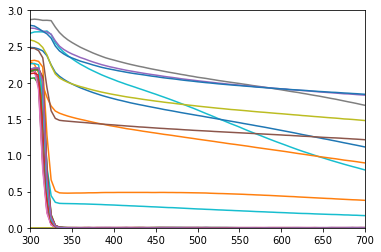

In [40]:
spectras = blanked_samples[wavelength_columns]
for i, spec in spectras.iterrows():
    spec = list(spec)
    plt.plot(wavelengths, spec)
    plt.xlim([300,700])
    plt.ylim([0,3])